In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sonar-mine-dataset/sonar data.csv


Read The Data 

In [3]:
Df_Sonar = pd.read_csv('/kaggle/input/sonar-mine-dataset/sonar data.csv',header=None)
Df_Sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Check How many rows and columns

In [4]:
print(f'Number Of rows : {Df_Sonar.shape[0]}')
print(f'Number Of Columns : {Df_Sonar.shape[1]}')

Number Of rows : 208
Number Of Columns : 61


# Check the Null values

In [5]:
Df_Sonar.isnull().sum().sum() 

0

How many values in the target column 

In [6]:
Df_Sonar[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [15]:
Df_Sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [185]:
Df_Sonar.groupby(Df_Sonar[60]).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [97]:
Df_Sonar[60]

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [170]:
list_tar = []
def encoding(datx): 
    for i in range (0,len(datx)):
        if datx[i] == 'R' : 
            list_tar.append(0)
        else : 
            list_tar.append(1)
    return list_tar

In [171]:
target_scater = encoding(Df_Sonar[60])

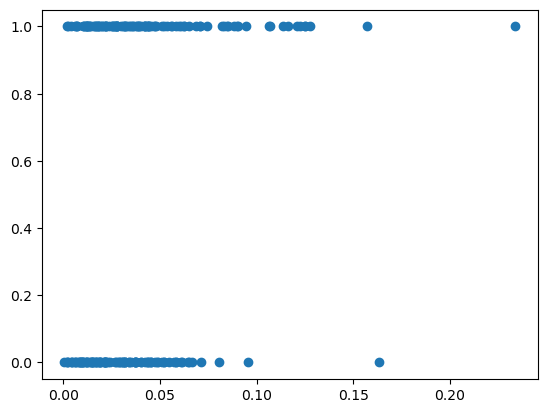

In [186]:
plt.scatter(Df_Sonar[1],target_scater)

In [86]:
Target  = Df_Sonar[60]
Target

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [47]:
Features = Df_Sonar.drop(columns=60,axis = 1)
Features 

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [48]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 

In [52]:
X_train , X_test , Y_train,Y_test=train_test_split(Features,Target,test_size=0.2,random_state= 1) 

In [61]:
Y_train.shape,Y_test.shape

((166,), (42,))

In [58]:
X_train.shape , X_test.shape, Features.shape

((166, 60), (42, 60), (208, 60))

In [62]:
Model = LogisticRegression()

In [63]:
Model.fit(Features,Target)

LogisticRegression()

In [67]:
Model.coef_ , Model.intercept_

(array([[-0.28039893, -0.33833483, -0.29871002, -0.65757032, -0.5113003 ,
         -0.08640533,  0.10059622, -0.00831914, -0.92832961, -1.05906481,
         -1.61970803, -1.43383225, -0.7658062 ,  0.00726896,  0.36386833,
          0.5994015 ,  0.50210637,  0.26558587, -0.35971113, -0.61702387,
         -0.67766039, -0.49135321, -0.41416994, -0.39053017,  0.26732154,
          0.3064264 , -0.06065647, -0.47523751, -0.32641874, -0.33419937,
          0.94292167, -0.13969045, -0.03468528,  0.42431454,  0.50961723,
          1.15835567,  0.84324713, -0.38798843, -0.53442551,  0.56933387,
         -0.14147475, -0.67625995, -0.94942408, -1.08604967, -1.48536625,
         -1.17160483, -0.80144519, -0.83510554, -0.53317826, -0.02627981,
         -0.14595838, -0.13814682, -0.05250237, -0.07349646, -0.0092967 ,
         -0.02676172,  0.00798177, -0.06520138, -0.06950908, -0.03461346]]),
 array([2.71130497]))

# Model Evaluation

In [195]:
X_train_prediction = Model.predict(X_train)

print(f'the accuracy in the Training Data is :{accuracy_score(X_train_prediction , Y_train)*100} %')

the accuracy in the Training Data is :83.73493975903614 %


In [196]:
X_Test_prediction = Model.predict(X_test)

print(f'the accuracy in the Training Data is :{accuracy_score(X_Test_prediction , Y_test)*100} %')

the accuracy in the Training Data is :80.95238095238095 %


# Predictive System

In [200]:
input_x = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,
           0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,
           0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,
           0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,
           0.0052,0.0121,0.0124,0.0055)

input_x_numpy = np.asarray(input_x).reshape(1,-1)

res = Model.predict(input_x_numpy) 
print(res)

if res[0] == 'R': 
    print('The object is Rock')
else : 
    print('The object is a Mine')

['M']
The object is a mine


In [203]:
i

array([[0.0307, 0.0523, 0.0653, 0.0521, 0.0611, 0.0577, 0.0665, 0.0664,
        0.146 , 0.2792, 0.3877, 0.4992, 0.4981, 0.4972, 0.5607, 0.7339,
        0.823 , 0.9173, 0.9975, 0.9911, 0.824 , 0.6498, 0.598 , 0.4862,
        0.315 , 0.1543, 0.0989, 0.0284, 0.1008, 0.2636, 0.2694, 0.293 ,
        0.2925, 0.3998, 0.366 , 0.3172, 0.4609, 0.4374, 0.182 , 0.3376,
        0.6202, 0.4448, 0.1863, 0.142 , 0.0589, 0.0576, 0.0672, 0.0269,
        0.0245, 0.019 , 0.0063, 0.0321, 0.0189, 0.0137, 0.0277, 0.0152,
        0.0052, 0.0121, 0.0124, 0.0055]])